### 建立评分卡过程
#### 导入数据

#### 探索性数据分析（EDA）Exploratory Data Analysis (EDA) is an open-ended process where we calculate statistics and make figures to find trends, anomalies, patterns, or relationships within the data. The goal of EDA is to learn what our data can tell us. It generally starts out with a high level overview, then narrows in to specific areas as we find intriguing areas of the data. The findings may be interesting in their own right, or they can be used to inform our modeling choices, such as by helping us decide which features to use.在这个过程中我们可以计算一些统计数据并可以画图，从中我们可以发现一些趋势，异常值，形态和数据之间的关系

#### 特征工程 Kaggle competitions are won by feature engineering: those win are those who can create the most useful features out of the data. (This is true for the most part as the winning models, at least for structured data, all tend to be variants on gradient boosting). This represents one of the patterns in machine learning: feature engineering has a greater return on investment than model building and hyperparameter tuning. This is a great article on the subject). As Andrew Ng is fond of saying: "applied machine learning is basically feature engineering." While choosing the right model and optimal settings are important, the model can only learn from the data it is given. Making sure this data is as relevant to the task as possible is the job of the data scientist (and maybe some automated tools to help us out). Feature engineering refers to a geneal process and can involve both feature construction: adding new features from the existing data, and feature selection: choosing only the most important features or other methods of dimensionality reduction. There are many techniques we can use to both create features and select features. 特征工程主要有特征构建和特征选择（包括选这或降维 Polynomial features Domain knowledge features

#### 建模，得到评分卡

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_set = pd.read_csv('cs-training.csv')

In [3]:
data_set.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


### EDA
#### 1、查看target列，查看是否是不平衡数据集

In [5]:
data_target = data_set['SeriousDlqin2yrs']

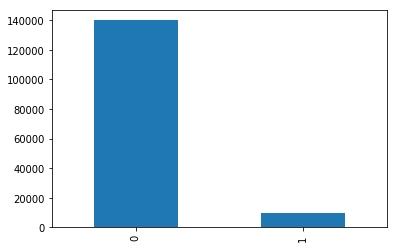

In [6]:
data_target.value_counts().plot(kind='bar')

In [7]:
print('少数类样本的比例是：{:0.2f}%'.format(data_target.value_counts().iloc[1]/len(data_target) * 100))

少数类样本的比例是：6.68%


####  少数类样本数目少于总体数目的10%，从图中可以看出该问题是不平衡数据集的问题，如果少数类样本特别少的话，可以考虑使用异常检测的方法来进行判断

#### 替换列的名字，方便处理

In [8]:
data_set.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [9]:
columns = ({'SeriousDlqin2yrs' : 'target', 
            'RevolvingUtilizationOfUnsecuredLines' : 'percentage',
           'NumberOfTime30-59DaysPastDueNotWorse':'30-59',
           'NumberOfOpenCreditLinesAndLoans': 'open_loan',
            'NumberOfTimes90DaysLate' : '90-',
           'NumberRealEstateLoansOrLines' : 'estate_loan',
           'NumberOfTime60-89DaysPastDueNotWorse': '60-89',
           'NumberOfDependents' : 'Dependents'})

In [10]:
data_set.drop(columns=['Unnamed: 0'], inplace=True)
data_set.rename(columns=columns, inplace=True)

In [11]:
data_set.head()

,target,percentage,age,30-59,DebtRatio,MonthlyIncome,open_loan,90-,estate_loan,60-89,Dependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


#### 2、处理缺失值
#### 查看有缺失值的特征以及缺失的数量

In [12]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
target           150000 non-null int64
percentage       150000 non-null float64
age              150000 non-null int64
30-59            150000 non-null int64
DebtRatio        150000 non-null float64
MonthlyIncome    120269 non-null float64
open_loan        150000 non-null int64
90-              150000 non-null int64
estate_loan      150000 non-null int64
60-89            150000 non-null int64
Dependents       146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.6 MB


#### 构建一个有缺失值的表格

In [13]:
def missing_values_table(df):
    mis_val = data_set.isnull().sum()
    mis_val_percent = data_set.isnull().sum() / len(data_set)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1: '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        by='Missing Values').round(2)
    print('You selected dataframe has ' +  str(df.shape[1]) + ' columns.\n'
         'There are ' + str(mis_val_table_ren_columns.shape[0]) + 
                          ' columns that have missing values.')
    return mis_val_table_ren_columns

In [14]:
missing_values_table(data_set)

You selected dataframe has 11 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Dependents,3924,0.03
MonthlyIncome,29731,0.20


#### 可以看出这个数据集中有两个，对于少量的缺失值可以直接删去，对于较多的确实值可以进行填补，用中值、均值或众数进行填补，也可以用算法填补一些预测并填补一些缺失值，如果特征时离散的可以作为一个新的类，或是在离散化时作为一个新的类，如果数量特别多，可以直接舍弃

In [15]:
data_set.dropna(axis=0, subset=['Dependents'], inplace=True)

In [16]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146076 entries, 0 to 149999
Data columns (total 11 columns):
target           146076 non-null int64
percentage       146076 non-null float64
age              146076 non-null int64
30-59            146076 non-null int64
DebtRatio        146076 non-null float64
MonthlyIncome    120269 non-null float64
open_loan        146076 non-null int64
90-              146076 non-null int64
estate_loan      146076 non-null int64
60-89            146076 non-null int64
Dependents       146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.4 MB


In [17]:
data_set.reset_index(inplace=True)

In [18]:
# 用中值进行填充
mon_incom = data_set.MonthlyIncome.copy()
mon_incom.fillna(mon_incom.median(), inplace=True)

In [19]:
# 用gbdt算法进行填充
mon_train_data = data_set.loc[data_set.MonthlyIncome.notnull()]
mon_predict_data = data_set.loc[data_set.MonthlyIncome.isnull()]
mon_train_X = mon_train_data.drop(columns=['target', 'MonthlyIncome'])
mon_train_y = mon_train_data['MonthlyIncome']
mon_predict_X = mon_predict_data.drop(columns=['target', 'MonthlyIncome'])
from sklearn.ensemble import GradientBoostingRegressor
gbdt = GradientBoostingRegressor()

In [20]:
gbdt.fit(mon_train_X, mon_train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [21]:
mon_predict_y = gbdt.predict(mon_predict_X)
mon_predict_data = mon_predict_X.join(pd.Series(mon_predict_y, name='MonthlyIncome', index=mon_predict_X.index)).drop(columns=['index'])
mon_predict_y = pd.Series(mon_predict_y, name='MonthlyIncome', index=mon_predict_X.index)
mon_incom_gbdt = pd.concat([mon_train_y, mon_predict_y]).copy()
mon_incom_gbdt.sort_index(inplace=True)

In [22]:
#计算两种算法得到的数值之间的相关性
np.corrcoef(mon_incom, mon_incom_gbdt)

array([[1.        , 0.98810819],
       [0.98810819, 1.        ]])

In [23]:
#对比数据的中值合均值
mon_data = data_set.MonthlyIncome[data_set.MonthlyIncome.notnull()].copy()

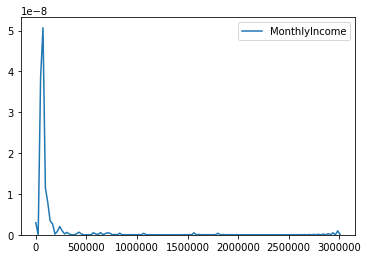

In [24]:
# 画概率密度曲线
sns.kdeplot(mon_data)

月收入的中值为：5400.00，月收入的均值为：6670.22


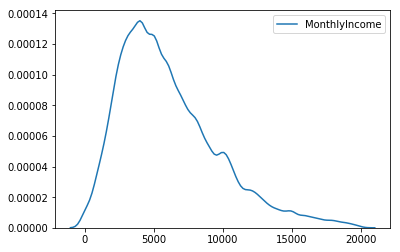

In [25]:
#去掉一些极值再画曲线
sns.kdeplot(mon_data[(mon_data > 0) & (mon_data < 20000)])
print('月收入的中值为：%.2f，月收入的均值为：%.2f' %(mon_data.median(), mon_data.mean()))
#可以看出其中均值相对于整体数据来说偏大，因此主要用中值

In [26]:
data_set.MonthlyIncome = mon_incom_gbdt
data_set.drop(columns=['index'], inplace=True)

#### 3、异常值处理（对于数据中的异常值，这种异常值有可能是错配，出现异常情况，或极端值）

In [27]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146076 entries, 0 to 146075
Data columns (total 11 columns):
target           146076 non-null int64
percentage       146076 non-null float64
age              146076 non-null int64
30-59            146076 non-null int64
DebtRatio        146076 non-null float64
MonthlyIncome    146076 non-null float64
open_loan        146076 non-null int64
90-              146076 non-null int64
estate_loan      146076 non-null int64
60-89            146076 non-null int64
Dependents       146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.3 MB


In [28]:
# 首先查看percentage
data_set['percentage'].describe()

count    146076.000000
mean          5.922272
std         250.070774
min           0.000000
25%           0.031018
50%           0.158818
75%           0.563684
max       50708.000000
Name: percentage, dtype: float64

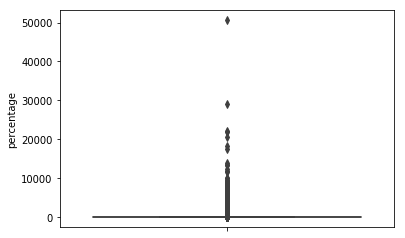

In [29]:
sns.boxplot(x=data_set.percentage, orient='v')

In [30]:
#### percentage应该是0到1
print('0到1之间比例的值为：%.2f' 
      %(len(data_set.percentage[(data_set.percentage > 0) & (data_set.percentage < 1)]) / len(data_set.percentage)))

0到1之间比例的值为：0.91


In [31]:
#去除异常值
data_set = data_set[(data_set.percentage > 0) & (data_set.percentage < 1)]

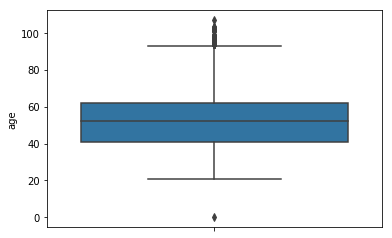

In [32]:
#查看年龄值
sns.boxplot(x=data_set['age'], orient='v')

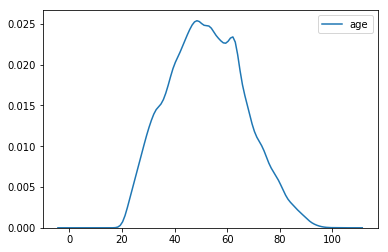

In [33]:
sns.kdeplot(data=data_set['age'])

In [34]:
#去除异常值
data_set = data_set[(data_set.age > 0) & (data_set.age < 100)]

In [35]:
data_set.shape

(132394, 11)

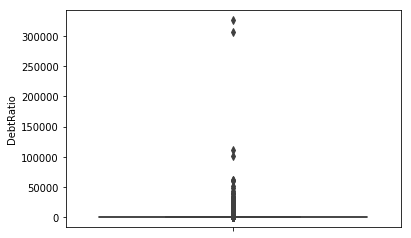

In [36]:
#查看DebtRationt列
sns.boxplot(x=data_set.DebtRatio, orient='v')

In [37]:
# 去除异常值
data_set = data_set[(data_set.DebtRatio < 1) & (data_set.DebtRatio > 0)]

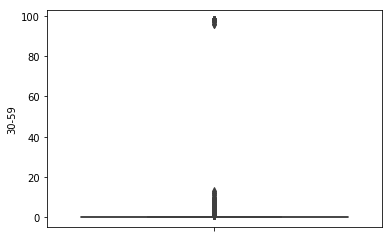

In [38]:
sns.boxplot(x=data_set['30-59'], orient='v')

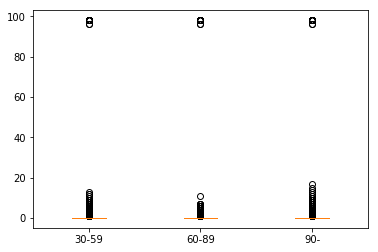

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([data_set['30-59'], data_set['60-89'], data_set['90-']])
ax.set_xticklabels(['30-59','60-89','90-'])
plt.show()

In [40]:
# 去除以上三列的异常值
data_set = data_set[data_set['30-59']<59]
data_set = data_set[data_set['60-89']<89]
data_set = data_set[data_set['90-']<90]

In [43]:
#去除开放式贷款数量达到50个以上合不动产数量达到20处以上的
data_set = data_set[data_set['open_loan'] <50]
data_set = data_set[data_set['estate_loan'] < 20]

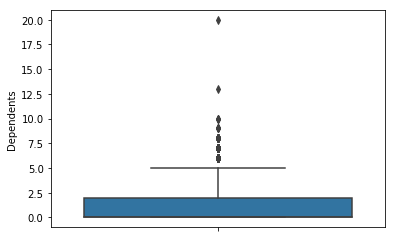

In [44]:
#查看亲属情况
sns.boxplot(x=data_set.Dependents, orient='v')

In [45]:
# 去掉亲属个数大于12的样本
data_set = data_set[data_set.Dependents < 12]

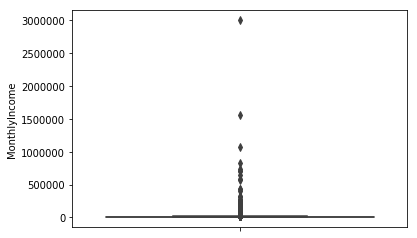

In [46]:
#查看月收入变量
sns.boxplot(x=data_set.MonthlyIncome, orient='v')

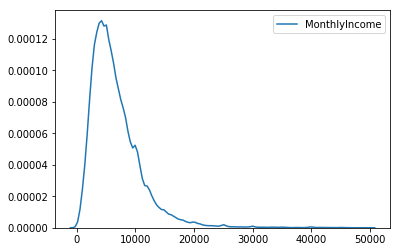

In [47]:
sns.kdeplot(data_set.MonthlyIncome[data_set.MonthlyIncome < 50000])

In [48]:
print('月收入中异常值比例为：%.4f' %(len(data_set.MonthlyIncome[data_set.MonthlyIncome < 50000]) / len(data_set.MonthlyIncome)))

月收入中异常值比例为：0.9971


In [49]:
data_set = data_set[data_set.MonthlyIncome < 50000]

#### 4、查看相关性

In [50]:
data_set.corr()

,target,percentage,age,30-59,DebtRatio,MonthlyIncome,open_loan,90-,estate_loan,60-89,Dependents
target,1.000000,0.243474,-0.096489,0.248007,0.064871,-0.049211,-0.025722,0.298895,-0.014677,0.240015,0.043931
percentage,0.243474,1.000000,-0.281625,0.225670,0.185320,-0.088135,-0.177545,0.225848,-0.072339,0.176683,0.088311
age,-0.096489,-0.281625,1.000000,-0.062499,-0.087144,0.093185,0.176940,-0.072840,0.058716,-0.062344,-0.216792
30-59,0.248007,0.225670,-0.062499,1.000000,0.096971,0.000496,0.067283,0.209478,0.029977,0.282542,0.054754
DebtRatio,0.064871,0.185320,-0.087144,0.096971,1.000000,-0.099357,0.330707,-0.006833,0.516274,0.035100,0.092358
MonthlyIncome,-0.049211,-0.088135,0.093185,0.000496,-0.099357,1.000000,0.263545,-0.057982,0.387208,-0.033181,0.177574
open_loan,-0.025722,-0.177545,0.176940,0.067283,0.330707,0.263545,1.000000,-0.096089,0.407047,-0.028694,0.034100
90-,0.298895,0.225848,-0.072840,0.209478,-0.006833,-0.057982,-0.096089,1.000000,-0.066425,0.282138,0.029530
estate_loan,-0.014677,-0.072339,0.058716,0.029977,0.516274,0.387208,0.407047,-0.066425,1.000000,-0.025219,0.128899
60-89,0.240015,0.176683,-0.062344,0.282542,0.035100,-0.033181,-0.028694,0.282138,-0.025219,1.000000,0.031478


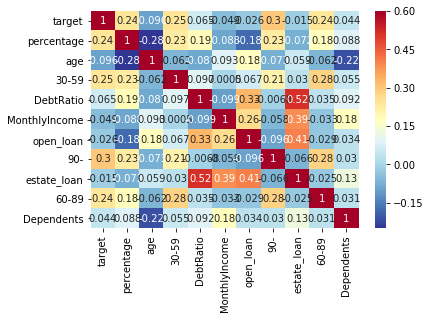

In [51]:
sns.heatmap(data_set.corr(),cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)

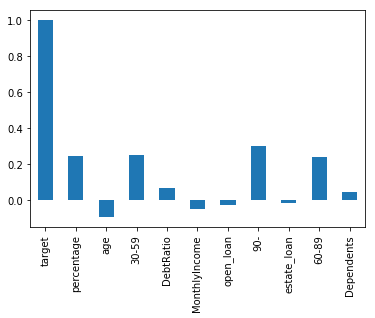

In [54]:
data_set.corr()['target'].plot(kind='bar')

#### 从柱状图中可以看出，违约与90天内违约记录关系比较大，而且存在一些相关性较小的变量

### 特征工程
#### 1、构建新的变量（构建新变量主要有对已有变量依据之间的关系，从中构建新的变量）

In [56]:
#查看样本的总贷款数量
sum_loan = data_set.open_loan + data_set.estate_loan
#查看样本从30到59天违约记录到60到89天违约记录的变化
change_89_59 = data_set['60-89'] - data_set['30-59']
#查看样本从90天违约记录到60到89天违约记录的变化
change_90_89 = data_set['90-'] - data_set['60-89']

In [57]:
data_set['sum_loan'] = sum_loan
data_set['change_89_59'] = change_89_59
data_set['change_90_89'] = change_90_89

In [58]:
data_set.corr()['target'].sort_values()

change_89_59    -0.143933
age             -0.096489
MonthlyIncome   -0.049211
sum_loan        -0.026131
open_loan       -0.025722
estate_loan     -0.014677
Dependents       0.043931
DebtRatio        0.064871
change_90_89     0.121586
60-89            0.240015
percentage       0.243474
30-59            0.248007
90-              0.298895
target           1.000000
Name: target, dtype: float64

#### 2、特征选择，主要依据重要性等（由于这里特征不多，因此不做特征选择了）

### 建模

In [61]:
from sklearn.model_selection import train_test_split
data_X, val_X, data_y, val_y = train_test_split(data_set.drop(columns=['target']), data_set['target'] ,test_size=0.3, random_state=0)

In [62]:
#在不做特征分箱的情况下，进行建模
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [63]:
lr.fit(data_X, data_y)

C:\Users\feigeZzzz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [64]:
val_y_predict = lr.predict(val_X)

In [65]:
from sklearn.metrics import roc_auc_score

In [66]:
roc_auc_score(val_y, val_y_predict)

0.563619347448011

In [67]:
from sklearn.ensemble import GradientBoostingRegressor

In [68]:
gb = GradientBoostingRegressor()
gb.fit(data_X, data_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [69]:
val_y_predict_2 = gb.predict(val_X)

In [70]:
roc_auc_score(val_y, val_y_predict_2)

0.8390527061106208

In [73]:
!pip install lightgbm -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [74]:
import lightgbm as lgb

In [80]:
gbm = lgb.LGBMClassifier(num_leaves=30, max_depth=5, n_estimators=150)

In [81]:
gbm.fit(data_X, data_y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=5,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=150, n_jobs=-1, num_leaves=30, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [82]:
val_y_predict_3 = gbm.predict(val_X)

In [83]:
roc_auc_score(val_y, val_y_predict_3)

0.5625574684148396